In [3]:
# Installs
!pip install pydeck -q
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns #seaborn plots
from matplotlib import pyplot as plt #plot control
sns.set() #plot style

#Geoplotting with folium/leaflet
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

#Fancy geoplotting with DeckGL
import pydeck as pdk

In [5]:
data = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-06-24/visualisations/listings.csv')

In [6]:
data

id                                               name    host_id  \
0          6983                               Copenhagen 'N Livin'      16774   
1         26057                Lovely house - most attractive area     109777   
2         26473          City Centre Townhouse Sleeps 1-10 persons     112210   
3         29118                    Best Location in Cool Istedgade     125230   
4         32379  165 m2  artist flat on Vesterbro, with 2 bathr...     140105   
...         ...                                                ...        ...   
12490  38610056  72m2 New apartment close to the city and water...   82892068   
12491  32483807         Beautiful and modern one-bedroom apartment  244063112   
12492  23864051   Villalejlighed Amager - praktisk og børnevenligt  179293254   
12493  50129088    Luxury apartment,  with perfect location in CPH  243593894   
12494   2908399                     Amazing 3BD with Harbor View!!   13530955   

         host_name  neighbourhood_group              neighbourhood   latitude  \
0            Simon                  NaN                    Nrrebro  55.686410   
1             Kari                  NaN                   Indre By  55.693070   
2            Julia                  NaN                   Indre By  55.676020   
3             Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4             Lise                  NaN  Vesterbro-Kongens Enghave  55.672638   
...            ...                  ...                        ...        ...   
12490  Abdel-Fatah                  NaN  Vesterbro-Kongens Enghave  55.657300   
12491         Lars                  NaN  Vesterbro-Kongens Enghave  55.657750   
12492       Helene                  NaN                  Amager st  55.638690   
12493         Tina                  NaN                    sterbro  55.696920   
12494      Bibiana                  NaN                Amager Vest  55.658680   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.547410  Entire home/apt    877               3                171   
1      12.576490  Entire home/apt   2400               4                 58   
2      12.575400  Entire home/apt   3350               3                293   
3      12.555040  Entire home/apt    725               7                 22   
4      12.552493  Entire home/apt   1153               3                 76   
...          ...              ...    ...             ...                ...   
12490  12.561830  Entire home/apt   1057               4                 41   
12491  12.563190  Entire home/apt   1471               1                 20   
12492  12.618530  Entire home/apt   1200               4                 10   
12493  12.596070  Entire home/apt   2800               4                  2   
12494  12.566250  Entire home/apt   3176               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2022-06-16               1.10                               1   
1      2022-05-15               0.56                               1   
2      2020-03-02               2.06                              11   
3      2019-08-02               0.15                               1   
4      2021-10-18               0.53                               2   
...           ...                ...                             ...   
12490  2022-06-14               1.41                               1   
12491  2020-06-30               0.51                               1   
12492  2022-04-14               0.19                               1   
12493  2022-06-21               2.00                               1   
12494         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm  license  
0                    22                      3      NaN  
1                   224                      8      NaN  
2                     3                      0      NaN  
3                    

In [7]:
data = data[data.number_of_reviews > 0]

In [8]:
data.room_type.value_counts()

Entire home/apt    8899
Private room       1255
Hotel room           22
Shared room          15
Name: room_type, dtype: int64

In [9]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [10]:
data = data[data.room_type.isin(['Private room', 'Entire home/apt'])]

In [11]:
data.neighbourhood.value_counts()

Vesterbro-Kongens Enghave    1701
Nrrebro                      1652
Indre By                     1601
sterbro                      1068
Frederiksberg                1000
Amager Vest                   929
Amager st                     773
Bispebjerg                    492
Valby                         434
Vanlse                        265
Brnshj-Husum                  239
Name: neighbourhood, dtype: int64

In [12]:
palette=['#FF8C00','#A034F0', '#159090']

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

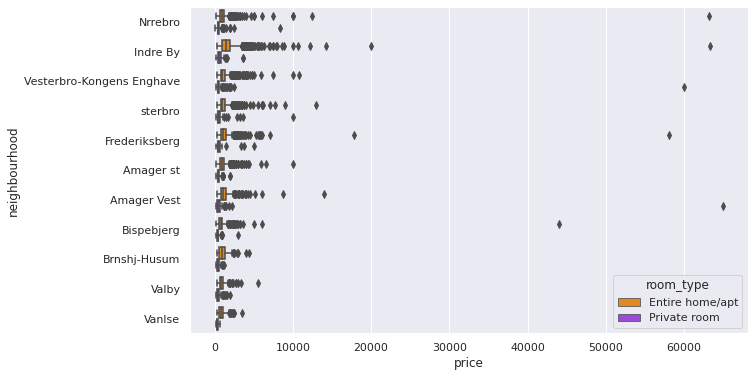

In [13]:
plt.figure(figsize=(10,6))

sns.boxplot(data = data, x = "price", y = "neighbourhood" , 
            hue = "room_type", palette=palette)

In [14]:
data['price_z'] = (data['price'] -data['price'].mean())/data['price'].std(ddof=0)

In [15]:
data['price_z'] = data['price_z'].abs()

In [16]:
data = data[data.price_z < 3]

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

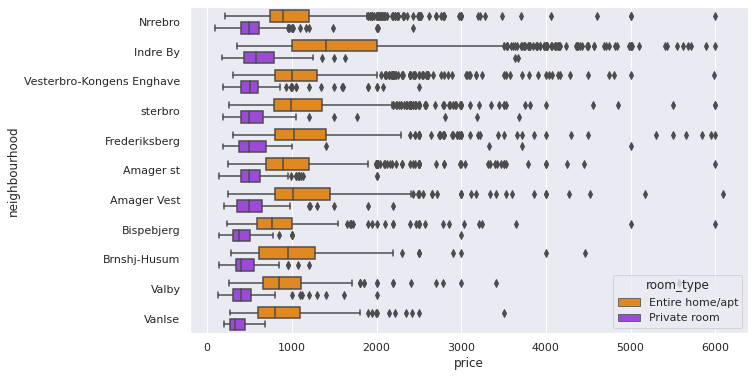

In [15]:
plt.figure(figsize=(10,6))

sns.boxplot(data = data, x = "price", y = "neighbourhood" , 
            hue = "room_type", palette=palette)

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

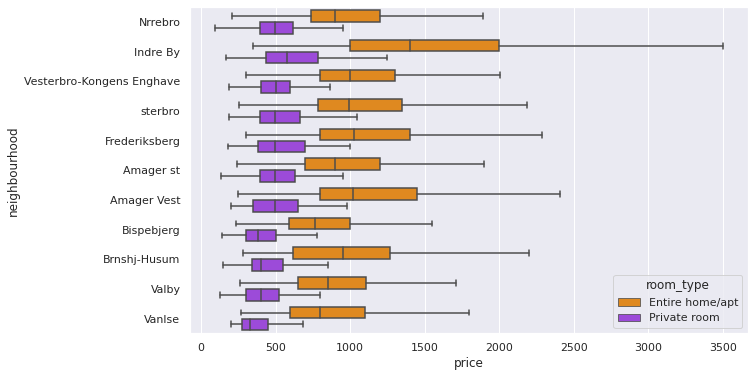

In [16]:
plt.figure(figsize=(10,6))

sns.boxplot(data = data, x = "price", y = "neighbourhood" , 
            hue = "room_type", palette=palette, showfliers=False)

In [17]:
data['log_price'] = np.log(data['price'])

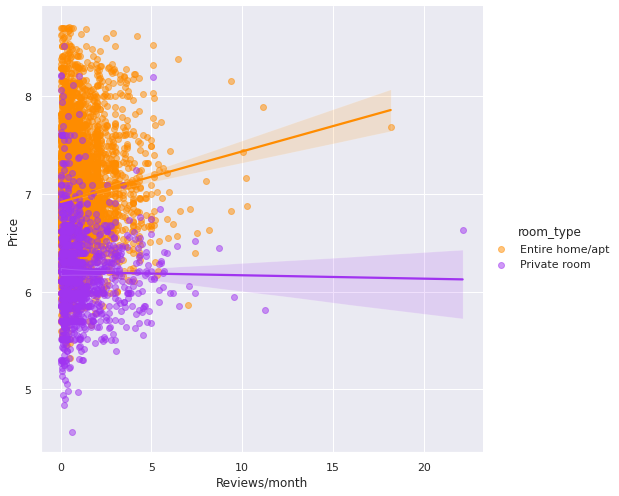

In [18]:
g = sns.lmplot(x="reviews_per_month",
               y="log_price",
               hue="room_type",
               height=7,
               data=data,
                scatter_kws={'alpha':0.5},
               palette=palette)
g.set_xlabels('Reviews/month')
g.set_ylabels('Price')

In [43]:
data_s = data.sample(500)

In [53]:
#Define the map
map = folium.Map(location=[data_s['latitude'].mean(), data_s['longitude'].mean(), zoom_start=12)

#add prettier base-layer
folium.TileLayer('cartodbpositron').add_to(map)

#add points (in a loop)
for j in data_s.iterrows():
    marker= folium.Circle(
        radius=30,
        location=[j[1]['latitude'], j[1]['longitude']],
        tooltip=j[1]['name'],
        popup=f"<b>{j[1]['name']}</b>\n {j[1]['price']}",
        color='purple',
        fill=True
    ).add_to(map)

#locations = zip(data['longitude'], data['latitude'])
#HeatMap(locations).add_to(map)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (64981146.py, line 2)

In [ ]:
map

In [24]:
#Define the map
map = folium.Map(location=[55.7800, 12.5400], zoom_start=12)

#add prettier base-layer
folium.TileLayer('cartodbpositron').add_to(map)

#add points (in a loop)
for j in data_s.iterrows():
    marker= folium.Circle(
        radius=30,
        location=[j[1]['latitude'], j[1]['longitude']],
        tooltip=j[1]['name'],
        popup=f"<b>{j[1]['name']}</b>\n {j[1]['price']}",
        color='purple',
        fill=True
    ).add_to(map)

locations = zip(data_s['latitude'], data_s['longitude'])
HeatMap(locations).add_to(map)

In [ ]:
map

In [26]:
data_s = data.sample(5000)

In [27]:
marker_cluster = MarkerCluster(
    name='CPH Airbnb',
    overlay=True,
    control=False,
    icon_create_function=None,
    showCoverageOnHover = False
)

In [34]:
#Define the map
map = folium.Map(location=[55.7800, 12.5400], zoom_start=12)

#add prettier base-layer
folium.TileLayer('cartodbpositron').add_to(map)

#add points (in a loop)
for j in data_s.iterrows(): # <--- using the whole dataset
    marker= folium.Circle(
        radius=30,
        location=[j[1]['latitude'], j[1]['longitude']],
        tooltip=j[1]['name'],
        popup=f"<b>{j[1]['name']}</b>\n {j[1]['price']}",
        color='purple',
        fill=True
    )
    marker_cluster.add_child(marker) # <<--- here we add the marker to the cluster rather than to the map directly

marker_cluster.add_to(map)

locations = zip(data_s['latitude'], data_s['longitude'])
HeatMap(locations).add_to(map)


In [ ]:
map

In [36]:
map.save('cph_folium.html')

In [37]:
# Define a layer to display on a map

layer = pdk.Layer(
    "HexagonLayer",
    data,
    get_position=["longitude", "latitude"],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    radius=50,
    opacity=0.3,
    elevation_range=[0, 200],
    extruded=True,
    coverage=1,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=data['latitude'].mean(), longitude=data['longitude'].mean(), zoom=11, min_zoom=5, max_zoom=15, pitch=40.5, bearing=-27.36)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{elevationValue}"})

In [ ]:
r.to_html(r'airbnb_hexa.html')

In [18]:
data

id                                               name    host_id  \
0          6983                               Copenhagen 'N Livin'      16774   
1         26057                Lovely house - most attractive area     109777   
2         26473          City Centre Townhouse Sleeps 1-10 persons     112210   
3         29118                    Best Location in Cool Istedgade     125230   
4         32379  165 m2  artist flat on Vesterbro, with 2 bathr...     140105   
...         ...                                                ...        ...   
12489   7200271                 House close to city center & beach   37702334   
12490  38610056  72m2 New apartment close to the city and water...   82892068   
12491  32483807         Beautiful and modern one-bedroom apartment  244063112   
12492  23864051   Villalejlighed Amager - praktisk og børnevenligt  179293254   
12493  50129088    Luxury apartment,  with perfect location in CPH  243593894   

         host_name  neighbourhood_group              neighbourhood   latitude  \
0            Simon                  NaN                    Nrrebro  55.686410   
1             Kari                  NaN                   Indre By  55.693070   
2            Julia                  NaN                   Indre By  55.676020   
3             Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4             Lise                  NaN  Vesterbro-Kongens Enghave  55.672638   
...            ...                  ...                        ...        ...   
12489         Rune                  NaN                  Amager st  55.644240   
12490  Abdel-Fatah                  NaN  Vesterbro-Kongens Enghave  55.657300   
12491         Lars                  NaN  Vesterbro-Kongens Enghave  55.657750   
12492       Helene                  NaN                  Amager st  55.638690   
12493         Tina                  NaN                    sterbro  55.696920   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.547410  Entire home/apt    877               3                171   
1      12.576490  Entire home/apt   2400               4                 58   
2      12.575400  Entire home/apt   3350               3                293   
3      12.555040  Entire home/apt    725               7                 22   
4      12.552493  Entire home/apt   1153               3                 76   
...          ...              ...    ...             ...                ...   
12489  12.630900  Entire home/apt   1350               2                  4   
12490  12.561830  Entire home/apt   1057               4                 41   
12491  12.563190  Entire home/apt   1471               1                 20   
12492  12.618530  Entire home/apt   1200               4                 10   
12493  12.596070  Entire home/apt   2800               4                  2   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2022-06-16               1.10                               1   
1      2022-05-15               0.56                               1   
2      2020-03-02               2.06                              11   
3      2019-08-02               0.15                               1   
4      2021-10-18               0.53                               2   
...           ...                ...                             ...   
12489  2019-07-02               0.06                               1   
12490  2022-06-14               1.41                               1   
12491  2020-06-30               0.51                               1   
12492  2022-04-14               0.19                               1   
12493  2022-06-21               2.00                               1   

       availability_365  number_of_reviews_ltm  license   price_z  log_price  
0                    22                      3      NaN  0.177632   6.776507  
1                   224                      8      NaN  0.740486   7.783224  
2               

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10114 entries, 0 to 12493
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10114 non-null  int64  
 1   name                            10114 non-null  object 
 2   host_id                         10114 non-null  int64  
 3   host_name                       10113 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10114 non-null  object 
 6   latitude                        10114 non-null  float64
 7   longitude                       10114 non-null  float64
 8   room_type                       10114 non-null  object 
 9   price                           10114 non-null  int64  
 10  minimum_nights                  10114 non-null  int64  
 11  number_of_reviews               10114 non-null  int64  
 12  last_review                     

In [23]:
import altair as alt

data = data.sample(5000)
alt.Chart(data).mark_bar().encode(
    x='mean(price):Q',
    y='room_type:O',
    color='room_type:N',
    row='neighbourhood:N',
    tooltip=["neighbourhood:N", "mean(price):Q"]
).interactive()

alt.Chart(...)